# Uniform Manifold Approximation and Projection

UMAP is a non-linear dimension reduction technique that can be used for visualisation. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure through the use of manifolds. This technique is new and can be found in this research paper: McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018


### When To Use
* Want to reduce variables
* Ensure variable independence
* Will change independent variables, changing how the data is visualized. This may or may not be a good thing
* provides early insight on the dataset
* This algorithm can be useful when a dataset is very large and complex
* Very Fast, even as it scales. Can handle datasets beyond T-SNE, can operate under millions of dimensions
* Can be used a dimesionality reduction as prelimary step. Thus, it can be used for clustering. 
* Preserves global structures of data
* Can be used for supervised/semi-supervised learning
<br>

### How Does it Work
* There are assumptions on the data:
    * 1.) The data is uniformly distributed on a Riemannian manifold
    * 2.) The Riemannian metric is locally constant (or can be approximated as such)
    * 3.) The manifold is locally connected
* With these assumptions: the algorithm acts under topography and manifold theory. When you deal with higher dimension space, it can be imagined as a multidimensional shape encased by a 2D planar skin. This planar skin can be represented into lower dimension like a 2D unfoled representation of a cube
* This algorithm uses fuzzy representations to model the data that can be utilized to derive metrics of a higher dimensional space
<br>

### Results 
* The algorithm will compress the higer dimension data and breaks it down to  components
<br>

### Limitations
* Has tunable hyperparameters
* Newer Technique, needs to be more rigorously tested

## IRIS Dataset

In [54]:
import numpy as np
import pandas as pd
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [55]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [56]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
#We have labeled data. So let us remove the target and keep only the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
x[0:5] #It is now a numpy array that houses all the data from the dataframe

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [58]:
y = df.loc[:,['target']].values # Let us keep the labels as well

In [61]:
#Scaling the data with a mean of 0 and a variance of 1
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [77]:
time_start = time.time()
embedding = umap.UMAP(n_neighbors=50).fit_transform(x)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.3660588264465332 seconds


In [78]:
principalDf = pd.DataFrame(data = embedding
             , columns = ['comp0', 'comp1'])
principalDf.head(5) 
#This shows we have two different dimensionality. Notice how the data isn't clear

,comp0,comp1
0,-8.530128,1.208762
1,-10.677568,0.977335
2,-10.262924,0.462073
3,-10.509340,0.364730
4,-8.701688,0.768942


In [79]:
#Since we know the original labels, we could see how the data has changed
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,comp0,comp1,target
0,-8.530128,1.208762,Iris-setosa
1,-10.677568,0.977335,Iris-setosa
2,-10.262924,0.462073,Iris-setosa
3,-10.509340,0.364730,Iris-setosa
4,-8.701688,0.768942,Iris-setosa


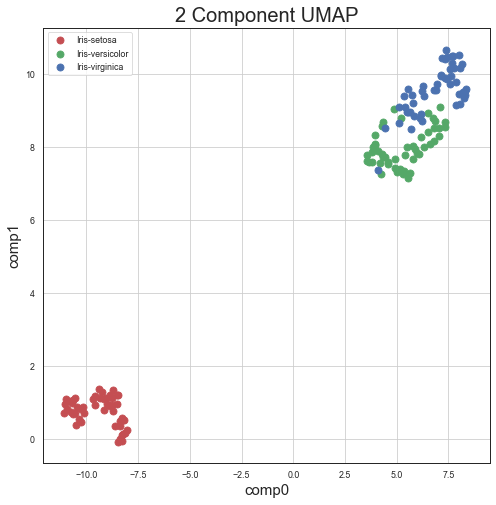

In [80]:
#Graph Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('comp0', fontsize = 15)
ax.set_ylabel('comp1', fontsize = 15)
ax.set_title('2 Component UMAP', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'comp0']
               , finalDf.loc[indicesToKeep, 'comp1']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## MINST Dataset

Classes: 10  <br/>
Samples: 7000 per class <br/>
Sample Total: 70000 <br/>
Dimensionality: 784 pixels = 28 x 28 x 1 <br/>
Features: Greyscale 0-255 integer values <br/>


In [12]:
import numpy as np
import time
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap

In [7]:
mnist = fetch_openml('mnist_784')

In [8]:
X = mnist.data / 255.0
y = mnist.target
print("Shape", X.shape)
print("Target", y.shape)

Shape (70000, 784)
Target (70000,)


In [11]:
#Create a Dataframe for easy use
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (70000, 786)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [14]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

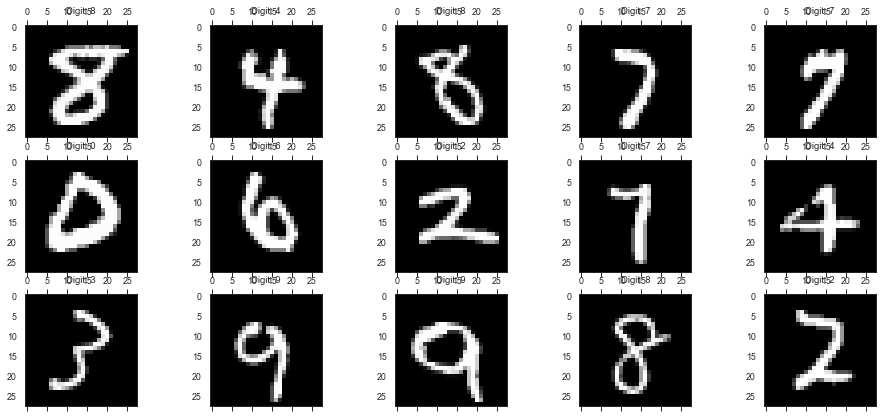

In [15]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [18]:
time_start = time.time()
embedding = umap.UMAP(n_neighbors=5).fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\Russel\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "C:\Users\Russel\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP done! Time elapsed: 218.0026044845581 seconds


In [50]:
feat_cols = [ 'comp'+str(i) for i in range(embedding.shape[1]) ]
df_embedding = pd.DataFrame(embedding,columns=feat_cols)
df_embedding['y'] = y
df_embedding['label'] = df_embedding['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df_embedding.shape))
df_embedding.head()

Size of the dataframe: (70000, 4)


,comp0,comp1,y,label
0,-1.907456,2.151288,5,5
1,-11.674918,-0.994796,0,0
2,1.001740,9.543457,4,4
3,7.773801,-5.368369,1,1
4,3.089915,5.195732,9,9


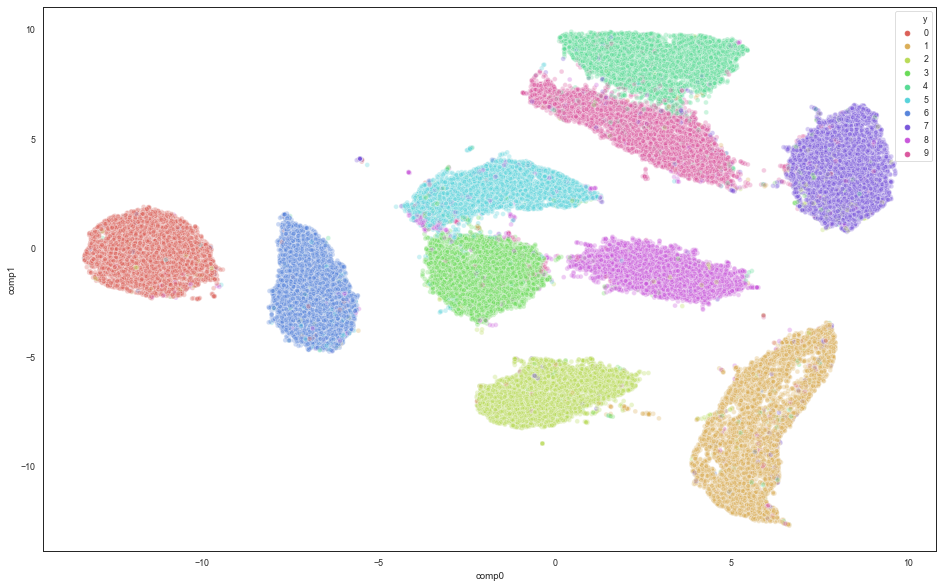

In [51]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp0", y="comp1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_embedding,
    legend="full",
    alpha=0.3
)

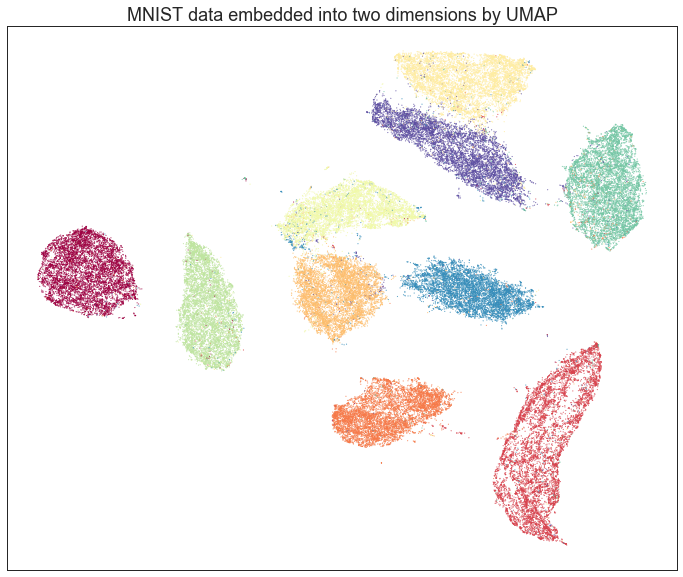

In [53]:
""" Alternate graph program
fig, ax = plt.subplots(figsize=(12, 10))
color = labels.astype(int)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)
plt.show()
"""

## Bokeh Representation

In [69]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10

import umap
from sklearn.datasets import load_iris

iris = load_iris()
embedding = umap.UMAP(
    n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(iris.data)

output_file("iris.html")


targets = [str(d) for d in iris.target_names]

source = ColumnDataSource(
    dict(
        x=[e[0] for e in embedding],
        y=[e[1] for e in embedding],
        label=[targets[d] for d in iris.target],
    )
)

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="Test UMAP on Iris dataset")
p.circle(
    x="x",
    y="y",
    source=source,
    color={"field": "label", "transform": cmap},
    legend="label",
)

show(p)

In [72]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10

import umap
from sklearn.datasets import load_digits

digits = load_digits()
embedding = umap.UMAP().fit_transform(digits.data)

output_file("digits.html")

targets = [str(d) for d in digits.target_names]

source = ColumnDataSource(
    dict(
        x=[e[0] for e in embedding],
        y=[e[1] for e in embedding],
        label=[targets[d] for d in digits.target],
    )
)

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="test umap")
p.circle(
    x="x",
    y="y",
    source=source,
    color={"field": "label", "transform": cmap},
    legend="label",
)

show(p)